In [2]:
import pandas as pd
import numpy as np
import os
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
def extract_letters(input_string):
    if isinstance(input_string, str):  
        return [char.lower() for char in re.findall(r'[a-zA-Z]', input_string)]
    return [] 
def find_csv_files_with_glob(path):
    # 使用**递归展开目录，查找所有.csv文件
    csv_files = glob.glob(os.path.join(path, '**', '*.xlsx'), recursive=True)
    return csv_files

directory_path = 'E:\human\endsurvey'
csv_paths = find_csv_files_with_glob(directory_path)
print(csv_paths)
p1p2=pd.read_excel(csv_paths[0],header=0)
p2=pd.read_excel(csv_paths[1],header=0)

['E:\\human\\endsurvey\\p1p2-endsurvey-sumup.xlsx', 'E:\\human\\endsurvey\\p2-only-endsurvey-sumup.xlsx', 'E:\\human\\endsurvey\\~$p1p2-endsurvey-sumup.xlsx']


In [4]:

p1p2_endsurvey=pd.DataFrame({'subject':
p1p2.iloc[:,0],
'P1first_round_hop':p1p2.iloc[:,2],
'P1score_strategy':p1p2.iloc[:,3],

'P2first_round_hop':p1p2.iloc[:,9],
'P2food_num_change':p1p2.iloc[:,7],
'P2food_group_num_change':p1p2.iloc[:,8],
'P2score_strategy':p1p2.iloc[:,10],
})

p2_endsurvey=pd.DataFrame({'subject':
p2.iloc[:,0],
'P2first_round_hop':p2.iloc[:,6],
'P2food_num_change':p2.iloc[:,5],
'P2food_group_num_change':p2.iloc[:,4],
'P2score_strategy':p2.iloc[:,7],
})



In [5]:
subject_list = []
def find_csv_files_with_glob(path):
    # 使用**递归展开目录，查找所有.csv文件
    csv_files = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)
    return csv_files

directory_path = r'D:\human_data'
csv_paths = find_csv_files_with_glob(directory_path)  
                                

In [6]:
p1p2_p1_thinking_time=np.empty([0,30])
p1p2_p2_thinking_time=np.empty([0,50])
p2_thinking_time=np.empty([0,50])
p1p2_p1_reward = []
p1p2_p2_reward = []
p2_only_reward = []
# p1p2_subject_count = 0
all_event_p1 = []
all_event_p2 = []
all_event_p2only = []

p1_ponder_position = []
p2_ponder_position = []
p2only_ponder_position = []

p1_thinking_dict = {}
p2_thinking_dict = {}
p2only_thinking_dict = {}



p2_only=0
p1p2=0
i = 0


# p1p2_colors = plt.cm.viridis(np.linspace(-1, 1, 20))
p2only_colors = plt.cm.viridis(np.linspace(0, 1, 20))
p1p2_colors = np.random.rand(20, 3)
for csv_file in csv_paths:
#     print(csv_file)
    subject_id = csv_file.split("\\")[3].split("_")[0]
    
    if subject_id.startswith('O') or subject_id.startswith('o'):
        subject_id = '10'+subject_id.split('ct')[1]
    else:
        if subject_id.startswith('N') or subject_id.startswith('n'):
#         print(subject)
            subject_id = '11'+subject_id.split('ov')[1]
    
    
    
#     print(subject_id)
    csv=pd.read_csv(csv_file)
    df=['reward','form1.response','phase','c4.started','b4.started','c4.stopped','b4.stopped']
    df_score_between_games=csv[['phase','reward']]
    # c1.startdded : p2开始的时间；c4.stopped : p2结束的时间
    # b1.startdded : p1开始的时间；b4.stopped : p1结束的时间
    phase = len(df_score_between_games['phase'].unique())
    
    if len(df_score_between_games['phase'].unique())==3:#p1、p2都做的人
#         plt.figure()
        df_score_between_games=csv[['phase','reward','c4.started','b1.started','c1.started','b4.started','c4.stopped','b4.stopped']]
#         p1_started_timestamp=df_score_between_games['b1.started']
        i +=1
        p1p2+=1
        df_phase2=df_score_between_games[df_score_between_games['phase']=='phase2']
        df_phase1=df_score_between_games[df_score_between_games['phase']=='phase1']
        
        
        [x for x in df_score_between_games['b4.started'].tolist() if not math.isnan(x)]
        
        p1_started_timestamp = [x for x in df_score_between_games['b4.started'].tolist() if not math.isnan(x)]
        p1_stopped_timestamp =  [x for x in df_score_between_games['b4.stopped'].tolist() if not math.isnan(x)]
        
        p2_started_timestamp = [x for x in df_score_between_games['c4.started'].tolist() if not math.isnan(x)]
        p2_stopped_timestamp =  [x for x in df_score_between_games['c4.stopped'].tolist() if not math.isnan(x)]
        
        p1_timegap = [x-y for x,y in zip(p1_stopped_timestamp,p1_started_timestamp)]
        p2_timegap = [x-y for x,y in zip(p2_stopped_timestamp,p2_started_timestamp)]

        p1_reward = [x for x in df_phase1['reward'].tolist() if not math.isnan(x)]
#         all_event_p1 = thinking_time_when_reward_change(all_event_p1,p1_reward,p1_timegap,20)
        
        p2_reward = [x for x in df_phase2['reward'].tolist() if not math.isnan(x)]
#         all_event_p2 = thinking_time_when_reward_change(all_event_p2,p2_reward,p2_timegap,20)
        
        
        p1p2_p1_reward.append(p1_reward)
        p1p2_p2_reward.append(p2_reward)

        ########################################

        filled_array = np.full(30, np.nan) # 将原始数据填充到新数组中 
        filled_array[:len(p1_timegap)] =p1_timegap
#         print(p1_timegap)
        
#         subject_and_phase = subject_id +'_p1'
        p1_thinking_dict[subject_id] = p1_timegap
        
        
    
        p1_timegap = np.expand_dims(filled_array, axis=0)
        
        filled_array = np.full(50, np.nan) # 将原始数据填充到新数组中 
        filled_array[:len(p2_timegap)] =p2_timegap
        
        
#         subject_and_phase = subject_id +'_p2'
        p2_thinking_dict[subject_id] = p2_timegap
        
        
        p2_timegap = np.expand_dims(filled_array, axis=0)

        p1p2_p1_thinking_time = np.concatenate((p1p2_p1_thinking_time, p1_timegap), axis=0)
        p1p2_p2_thinking_time = np.concatenate((p1p2_p2_thinking_time, p2_timegap), axis=0)
        
        
        

            
    elif len(df_score_between_games['phase'].unique())==2:#只做p2的人
        
#         plt.figure()
        df_score_between_games=csv[['phase','reward','c1.started','c4.stopped','c4.started']]
        p2_only+=1
        df_phase2=df_score_between_games[df_score_between_games['phase']=='phase2']
        
        
        
        p2_started_timestamp = [x for x in df_score_between_games['c4.started'].tolist() if not math.isnan(x)]
        p2_stopped_timestamp =  [x for x in df_score_between_games['c4.stopped'].tolist() if not math.isnan(x)]
        
#         p1_timegap = [x-y for x,y in zip(p1_stopped_timestamp,p1_started_timestamp)]
        p2_timegap = [x-y for x,y in zip(p2_stopped_timestamp,p2_started_timestamp)]
        p2_reward = [x for x in df_phase2['reward'].tolist() if not math.isnan(x)]
#         all_event_p2only = thinking_time_when_reward_change(all_event_p2only,p2_reward,p2_timegap,20)
#
        p1_reward=None
        p1_timegap=None
        p2_only_reward.append(p2_reward)
#         draw_thinking_time_and_goal(save_in_folder,subject_id,phase,p1_reward,p2_reward,p1_timegap,p2_timegap)
        
#         overall_thinking_time_and_reward(save_in_folder,subject_id,phase,p1_reward,p2_reward,p1_timegap,p2_timegap)
        filled_array = np.full(50, np.nan) # 将原始数据填充到新数组中 
        filled_array[:len(p2_timegap)] =p2_timegap
        
#         subject_and_phase = subject_id +'_p2only'
        p2only_thinking_dict[subject_id] = p2_timegap
        
        
        p2_timegap = np.expand_dims(filled_array, axis=0)
# #         print(p1_timegap)
#         print(p1_timegap.shape)
# #         print(p1p2_p1_time.shape)
        p2_thinking_time = np.concatenate((p2_thinking_time, p2_timegap), axis=0)
        
#         p2.append(max(df_phase2.reward))
    else:
        print(csv_file)


In [16]:
# p2only_thinking_dict
p1p2_sub_list = np.array(p1p2_endsurvey['subject'])[~np.isnan(np.array(p1p2_endsurvey['subject']))]
for sub in p1p2_sub_list:
    p1_thinking_time = np.nanmean(p1_thinking_dict[str(int(sub))])
    p1p2_endsurvey.loc[p1p2_endsurvey['subject'] == sub,'p1_thinking_time'] = p1_thinking_time
    
    p2_thinking_time = np.nanmean(p2_thinking_dict[str(int(sub))])
    p1p2_endsurvey.loc[p1p2_endsurvey['subject'] == sub,'p2_thinking_time'] = p2_thinking_time
    
p2only_sub_list = np.array(p2_endsurvey['subject'])[~np.isnan(np.array(p2_endsurvey['subject']))]
for sub in p2only_sub_list:
    if str(int(sub)) != '110501' and  str(int(sub)) != '110802':
        p2_thinking_time = np.nanmean(p2only_thinking_dict[str(int(sub))])
        p2_endsurvey.loc[p2_endsurvey['subject'] == sub,'p2_thinking_time'] = p2_thinking_time


In [26]:
# p2_endsurvey

In [46]:
# p1p2_endsurvey['p2_thinking_time']

## Strategy Change

C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1647693341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P1score_strategy_ans']=pd_hop['P1score_strategy'].apply(extract_letters)
C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1647693341.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P2score_strategy_ans']=pd_hop['P2score_strategy'].apply(extract_letters)
C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1647693341.py:30: SettingWithCopyWarning: 
A value is trying 

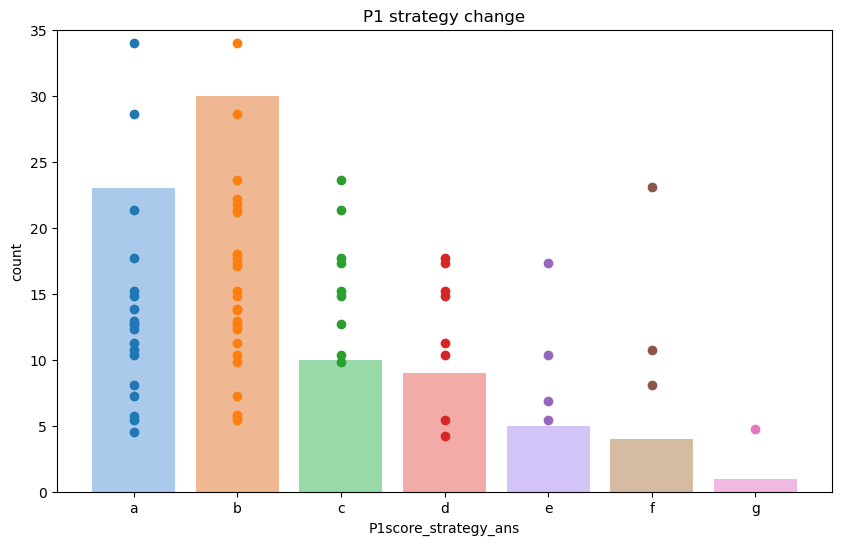

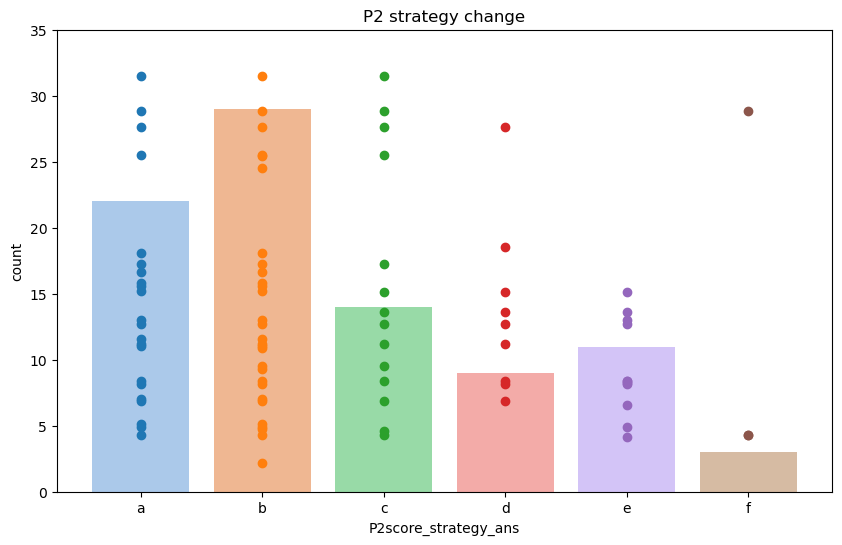

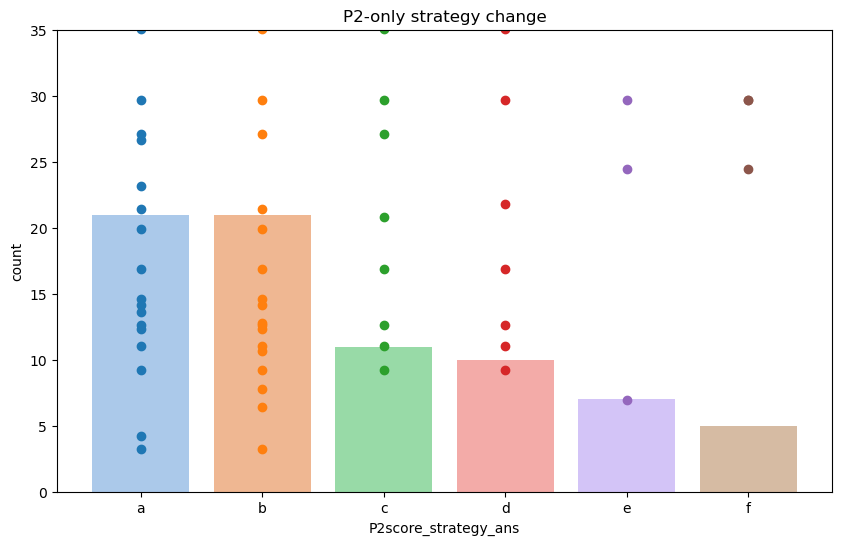

In [23]:
title_ls=['P1','P2-only']
for i,pd_hob_df in enumerate([p1p2_endsurvey]):
    pd_hop=pd_hob_df[pd_hob_df.subject>0]
    pd_hop['P1score_strategy_ans']=pd_hop['P1score_strategy'].apply(extract_letters)
#     print(pd_hop)
    explode_pd = pd_hop.explode('P1score_strategy_ans')
    expanded_data = explode_pd['P1score_strategy_ans']
    thinking_time = explode_pd['p1_thinking_time']
#     print(thinking_time)
    expanded_data = expanded_data.dropna() 
    plt.figure(figsize=(10, 6))
    plt.title(title_ls[i]+' strategy change')
    sns.countplot(x=expanded_data, palette='pastel',order=np.sort(expanded_data.unique()))
#     sns.countplot(x=data['category'], palette='pastel', order=np.sort(data['category'].unique()))

    # 在计数图基础上绘制散点图
    for category in np.sort(expanded_data.unique()):
        subset = explode_pd[explode_pd['P1score_strategy_ans'] == category]
#         print(subset)
        plt.scatter([category] * len(subset), subset['p1_thinking_time'], label=category)

    
    
    plt.ylim(0,35)
    # plt.ylim(0,50)

title_ls=['P2','P2-only']
for i,pd_hob_df in enumerate([p1p2_endsurvey,p2_endsurvey]):
    pd_hop=pd_hob_df[pd_hob_df.subject>0]
    pd_hop['P2score_strategy_ans']=pd_hop['P2score_strategy'].apply(extract_letters)
    explode_pd = pd_hop.explode('P2score_strategy_ans')
    expanded_data = explode_pd['P2score_strategy_ans']
    thinking_time = explode_pd['p2_thinking_time']

    expanded_data = expanded_data.dropna() 
    plt.figure(figsize=(10, 6))
    plt.title(title_ls[i]+' strategy change')
    sns.countplot(x=expanded_data, palette='pastel',order=np.sort(expanded_data.unique()))
    
        # 在计数图基础上绘制散点图
    for category in np.sort(expanded_data.unique()):
        subset = explode_pd[explode_pd['P2score_strategy_ans'] == category]
#         print(subset)
        plt.scatter([category] * len(subset), subset['p2_thinking_time'], label=category)
    
    
    plt.ylim(0,35)
    # plt.ylim(0,50)

## First Round guess

C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1923157626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P1first_round_ans']=pd_hop['P1first_round_hop'].apply(extract_letters)
C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1923157626.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P2first_round_ans']=pd_hop['P2first_round_hop'].apply(extract_letters)
C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1923157626.py:24: SettingWithCopyWarning: 
A value is trying to b

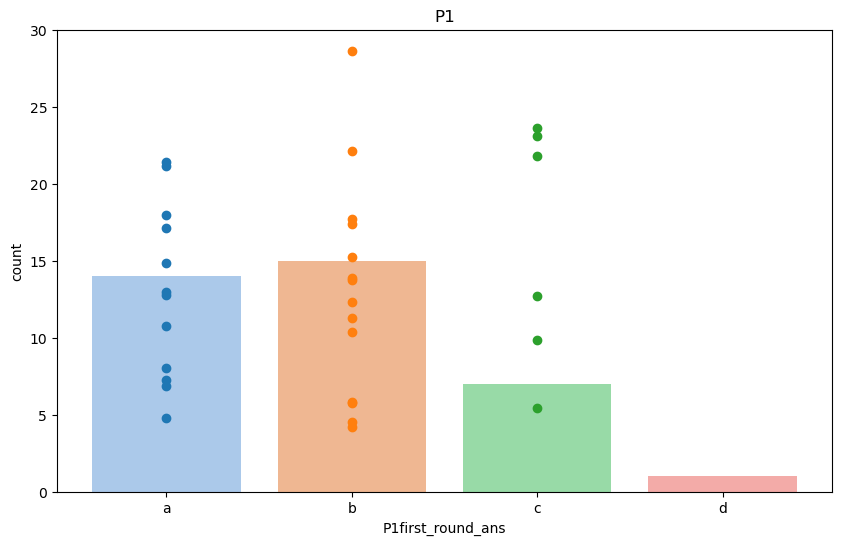

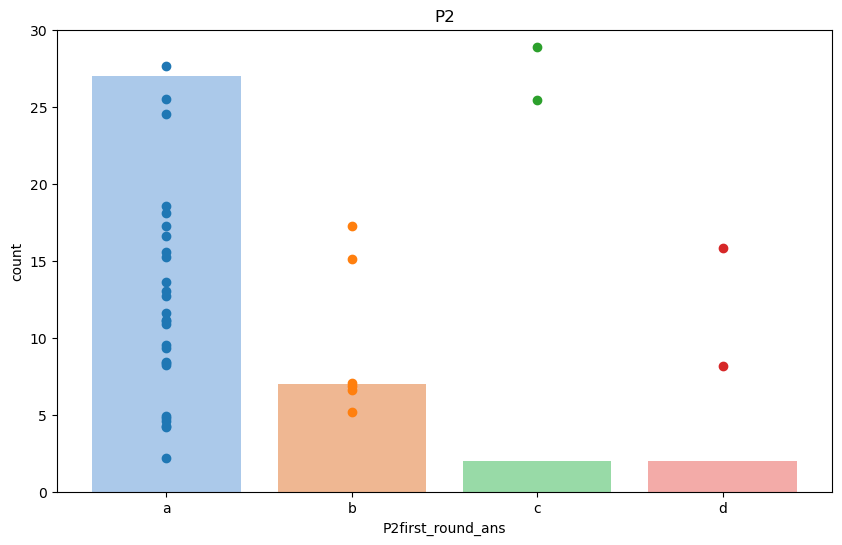

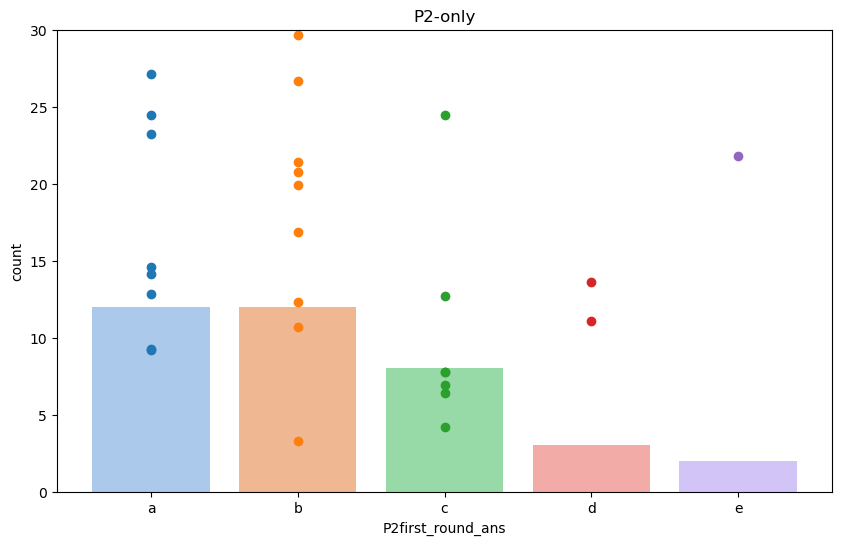

In [27]:
title_ls=['P1','P2-only']
for i,pd_hob_df in enumerate([p1p2_endsurvey]):
    pd_hop=pd_hob_df[pd_hob_df.subject>0]
    pd_hop['P1first_round_ans']=pd_hop['P1first_round_hop'].apply(extract_letters)
    
    explode_pd = pd_hop.explode('P1first_round_ans')
    expanded_data = explode_pd['P1first_round_ans']
    thinking_time = explode_pd['p1_thinking_time']
    
    plt.figure(figsize=(10, 6))
    plt.title(title_ls[i])
    sns.countplot(x=expanded_data, palette='pastel',order=np.sort(expanded_data.unique()))
    for category in np.sort(expanded_data.unique()):
        subset = explode_pd[explode_pd['P1first_round_ans'] == category]
#         print(subset)
        plt.scatter([category] * len(subset), subset['p1_thinking_time'], label=category)
    
    plt.ylim(0,30)


title_ls=['P2','P2-only']
for i,pd_hob_df in enumerate([p1p2_endsurvey,p2_endsurvey]):
    pd_hop=pd_hob_df[pd_hob_df.subject>0]
    pd_hop['P2first_round_ans']=pd_hop['P2first_round_hop'].apply(extract_letters)
    explode_pd = pd_hop.explode('P2first_round_ans')
    expanded_data = explode_pd['P2first_round_ans']
    thinking_time = explode_pd['p2_thinking_time']
    
    expanded_data = pd_hop['P2first_round_ans'].explode()
    expanded_data = expanded_data.dropna() 
    plt.figure(figsize=(10, 6))
    plt.title(title_ls[i])
    sns.countplot(x=expanded_data, palette='pastel',order=np.sort(expanded_data.unique()))
    for category in np.sort(expanded_data.unique()):
        subset = explode_pd[explode_pd['P2first_round_ans'] == category]
#         print(subset)
        plt.scatter([category] * len(subset), subset['p2_thinking_time'], label=category)
    
    plt.ylim(0,30)


## P2food_num_change

C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1007747771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P2food_num_change_ans']=pd_hop['P2food_num_change'].apply(extract_letters)
C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\1007747771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P2food_num_change_ans']=pd_hop['P2food_num_change'].apply(extract_letters)


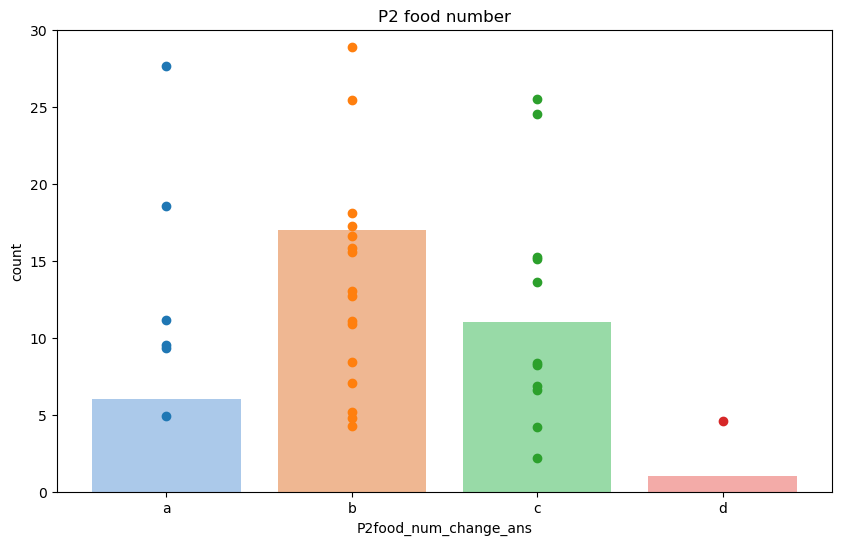

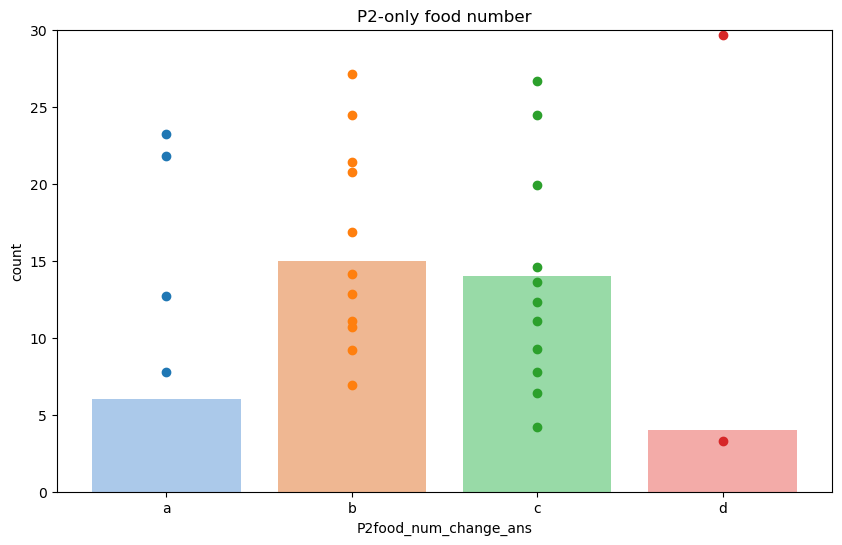

In [28]:
title_ls=['P2','P2-only']
for i,pd_hob_df in enumerate([p1p2_endsurvey,p2_endsurvey]):
    pd_hop=pd_hob_df[pd_hob_df.subject>0]
    pd_hop['P2food_num_change_ans']=pd_hop['P2food_num_change'].apply(extract_letters)
    
    explode_pd = pd_hop.explode('P2food_num_change_ans')
    expanded_data = explode_pd['P2food_num_change_ans']
    thinking_time = explode_pd['p2_thinking_time']
    expanded_data = pd_hop['P2food_num_change_ans'].explode()
    expanded_data = expanded_data.dropna() 
    plt.figure(figsize=(10, 6))
    plt.title(title_ls[i]+' food number')
    sns.countplot(x=expanded_data, palette='pastel',order=np.sort(expanded_data.unique()))
    for category in np.sort(expanded_data.unique()):
        subset = explode_pd[explode_pd['P2food_num_change_ans'] == category]
#         print(subset)
        plt.scatter([category] * len(subset), subset['p2_thinking_time'], label=category)
    
    plt.ylim(0,30)

## P2food_group_change

C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\424006763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P2food_group_num_change_ans']=pd_hop['P2food_group_num_change'].apply(extract_letters)
C:\Users\Windows11\AppData\Local\Temp\ipykernel_22728\424006763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hop['P2food_group_num_change_ans']=pd_hop['P2food_group_num_change'].apply(extract_letters)


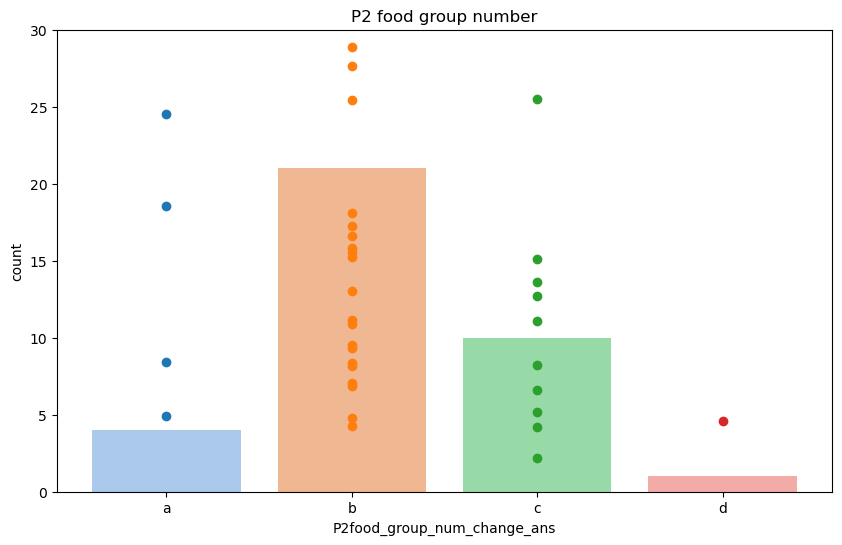

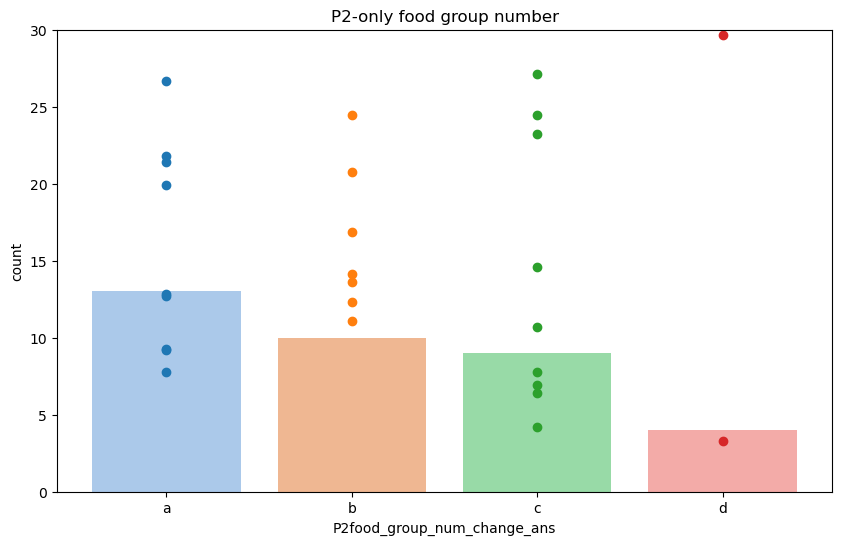

In [29]:
title_ls=['P2','P2-only']
for i,pd_hob_df in enumerate([p1p2_endsurvey,p2_endsurvey]):
    pd_hop=pd_hob_df[pd_hob_df.subject>0]
    pd_hop['P2food_group_num_change_ans']=pd_hop['P2food_group_num_change'].apply(extract_letters)
    explode_pd = pd_hop.explode('P2food_group_num_change_ans')
    expanded_data = explode_pd['P2food_group_num_change_ans']
    thinking_time = explode_pd['p2_thinking_time']
    
    expanded_data = pd_hop['P2food_group_num_change_ans'].explode()
    expanded_data = expanded_data.dropna() 
    plt.figure(figsize=(10, 6))
    plt.title(title_ls[i]+' food group number')
    sns.countplot(x=expanded_data, palette='pastel',order=np.sort(expanded_data.unique()))
    for category in np.sort(expanded_data.unique()):
        subset = explode_pd[explode_pd['P2food_group_num_change_ans'] == category]
#         print(subset)
        plt.scatter([category] * len(subset), subset['p2_thinking_time'], label=category)
    plt.ylim(0,30)